# Differential Equations (ODE) - continuation
***INITIAL VALUE PROBLEM***

## Dictionary
* hence: asi, entonces, por eso

  "His mother was Italian, hence his name – Simone"
  
  
* span: intervalo, duracion

  "An average life span of man in Europe is 70 years"
  
  "span of values: from xini to xfin"


* weight: peso

  weighted average

## Order of the class:
* recap on the Euler method
* comparison with Heun and midpoint method
* error of the Euler method
* generalization and Runge-Kutta (RK)
* implementation of the RK4 method
* review on the scipy routines for solving differential equations 

# Generalization of the numerical methods of solving differential equations:

#### Recall Euler method:

<img src="imgs/euler_method.png" width="300" />

which can be implemented as:
$$y_{i+1} = y_{i} + f(x_i,y_i) h  $$

* but one can calculate the derivative in different ways, for example:

#### Heun's method (aka predictor-corrector method)
<img src="imgs/heun_method.png" width="300" />
which basically takes average of slope at two points as:

$$y_{i+1} = y_{i} + \frac {f(x_i,y_i) + f(x_{i+1},y^{0}_{i+1})}{2} h  $$

#### Midpoint method:
<img src="imgs/midpoint_method.png" width="300" />
which takes a slope in between the two points as:
$$y_{i+1} = y_{i} + f(x_{i+1/2},y_{i+1/2}) h  $$

* the details are not important (there are plenty of detailed articles about it). What is worth noticing that $\textbf {the derivative (the slope) can be calculated in many different ways:}$

## To generalize, let's derive the Euler formula and its error from Taylor Series:
*recall the error estimate of the derivative from Tayor Series in the class about derivatives 

$$y_{i+1} = y_{i} + f(x_i,y_i) h  $$
which is the same as:
$$y_{i+1}=y_i+  \frac{dy}{dx}  \Big|_{x_i,y_i} \left( x_{i+1} - x_{i} \right)$$

$$y_{i+1}=y_i+  \frac{dy}{dx}  \Big|_{x_i,y_i} \left( x_{i+1} - x_{i} \right)+  \frac{1}{2!} \frac{d^2y}{dx^2}  \Big|_{x_i,y_i} \left( x_{i+1} - x_{i} \right)^2 +  \frac{1}{3!} \frac{d^3y}{dx^3}  \Big|_{x_i,y_i} \left( x_{i+1} - x_{i} \right)^3 + ...$$

$$y_{i+1}=y_i+  \frac{dy}{dx}  \Big|_{x_i,y_i} h +  \frac{1}{2!} \frac{d^2y}{dx^2}  \Big|_{x_i,y_i} h^2 + \frac{1}{3!} \frac{d^3y}{dx^3}  \Big|_{x_i,y_i} h^3 + ...$$

Where we can easily identify the first two terms as an Euler formula.

That means everything $\textbf{after}$ $y_i+  \frac{dy}{dx}  \Big|_{x_i,y_i} \left( x_{i+1} - x_{i} \right)$... is en error of the Euler formula

* so the global error of the Euler method is of the first order $O(h)$ and hence the method can be exact if $y(x)$ is linear

## Runge-Kutta family methods:

In the forward Euler method, we used the information on the slope or the derivative of $y$ at the given time step to extrapolate the solution to the next time-step. Runge-Kutta methods are a class of methods which use the information on the 'slope' at more than one point to extrapolate the solution to the future time step. 

However, finding $\frac{dy}{dx}  \Big|_{x_i,y_i}$ is already difficult, so finding $\frac{d^2y}{dx^2}  \Big|_{x_i,y_i}$ and other terms is even more difficult.  What Runge and Kutta did was write the 2nd order method instead of this:
$$y_{i+1}=y_i+  \frac{dy}{dx}  \Big|_{x_i,y_i} \left( x_{i+1} - x_{i} \right)+  \frac{1}{2!} \frac{d^2y}{dx^2}  \Big|_{x_i,y_i} \left( x_{i+1} - x_{i} \right)^2$$

as (!!!!)

$$y_{i+1} = y_{i} + (a_1 k_1 + a_2 k_2) h  $$
where:
$$k_1=f(x_i,y_i)$$
$$k_2=f(x_i+p_1 h, y_1 + q_{11}k_1 h)$$

and determine the coefficients: $a_1,p_1,a_2,q_{11}$ using Taylor series.

$\textbf{Basically: the approximation of the “next step” is given by weighted average of these four k-values as}$ $\textbf{weighted average of slopes!}$

* one can easily see that only $k_1$ is taken and $k_2$ neglected then the above reduces to Euler method
hence Euler method is considered as a first order Runge - Kutta method 

### Higher order Runge - Kutta methods
* the second order RK method is already better that first order method called Euler method.
  But the real improvement that found many applications is called forth order Runge - Kutta method. Without derivation we can write it as:

$$y_{i+1} = y_i+h(k_1 + 2k_2 + 2k_3 + k_4)/6$$
where
$$k_1=f(x_i,y_i)$$
$$k_2=f(x_i+h/2,y_i+k_1 h/2)$$
$$k_3=f(x_i+h/2,y_i+k_2 h/2)$$
$$k_4=f(x_i+2,y_i+k_3 h)$$

*this method is $4^{th}$ order acurate and its very popular

## Example
Lets take the same example as previously:
$$ \frac{dy}{dx} = yx^2 -1.2y $$
$$ f(x,y) = yx^2 -1.2y$$
We can define the know function:
$$ \frac{dy}{dx} = f(x,y) $$
wit the inital condition $y(0)=1$ over the interval of [0,2], using h=0.5 

first the $k$ coefficients must be calculated
$$k_1=f(x_i,y_i)$$
$$k_2=f(x_i+h/2,y_i+k_1 h/2)$$
$$k_3=f(x_i+h/2,y_i+k_2 h/2)$$
$$k_4=f(x_i+2,y_i+k_3 h)$$

$i=0:$ \
$k_1=f(0,1)=-1.2$ \
$k_2=f(0.25,0.7)=-0.79625$ \
$k_3=f(0.25,0.8)=-0.911$ \
$k_4=f(0.5,0.5445)=-0.512$

then $y_{i+1}$ can be found substituting the $k_{1..4}$:

$y_{i+1} = y_i+h(k_1 + 2k_2 + 2k_3 + k_4)/6$

$y_1(0.5)=0.57234$

... and so on for $i=1,2,3,4...$ 

# Implementation of $4^{th}$ order Runge - Kutta    
only Instructional 

Lets take the same example as previously:
$$ f(x,y) = yx^2 -1.2y$$
We can define the know function:
$$ \frac{dy}{dx} = f(x,y) $$
wit the inital condition $y(0)=0.76$ over the interval of [-2,2], using h=0.5 

In [1]:
# Python program to implement Runge Kutta method
# A sample differential equation "dy / dx = (x - y)/2"
import numpy as np

def derivs(x, y):
    return y*x**2-1.2*y
 
# Finds value of y for a given x using step size h
# and initial value y0 at x0.
def rungeKutta(x0, y0, xfin, h):
    yout=[]
    xout=[]
    # Count number of iterations using step size or
    # step height h
    n = (int)((xfin - x0)/h)
    # Iterate for number of iterations
    y = y0
    yout.append(y)
    xout.append(x0)
    for i in range(1, n + 1):
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * derivs(x0, y)
        k2 = h * derivs(x0 + 0.5 * h, y + 0.5 * k1)
        k3 = h * derivs(x0 + 0.5 * h, y + 0.5 * k2)
        k4 = h * derivs(x0 + h, y + k3)
 
        # Update next value of y
        y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
        yout.append(y)
        # Update next value of x
        x0 = x0 + h
        xout.append(x0)
    return xout,yout
 
# Driver method
xini = -2
y0 = 0.76
xfin = 2
h = 0.5
xrk,yrk=rungeKutta(xini, y0, xfin, h)

In [2]:
print(yrk)

[0.76, 1.9384992262369791, 2.3476623264324123, 1.7243105880061376, 0.9868982056819564, 0.5648449155001062, 0.41486718827163716, 0.5024340764215497, 1.281536932076665]


In [3]:
xexact=np.linspace(xini,xfin,101)
yexact=np.exp((xexact**3)/3-1.2*xexact)

1.281536932076665


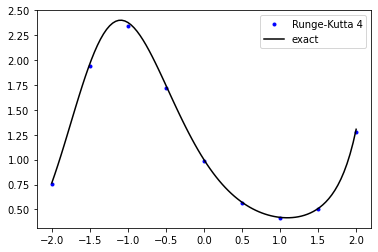

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
ax.plot(xrk,yrk,'.b',label='Runge-Kutta 4')
ax.plot(xexact,yexact,'-k',label='exact')
ax.legend()
print(yrk[-1])

## Using Scipy to solve ODEs INITIAL VALUE PROBLEM - two methods
Althougt the above example of RK4 is already good enough, scipy offers more optimized versions:

Scipy  offers two methods to solve ODE initial value problem:

* ***scipy.integrate.odeint***
* ***scipy.integrate.solve_ivp()***


* https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html 

* both are very similar
* scipy.integrate.solve_ivp() is prefered due being more modern and having more options

## SCIPY.INTEGRATE.ODEINT
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint 

* (just in case you see a profesor using this one)

Lets take the same example as previously:

$$ \frac{dy}{dt} = yt^2 -1.2y$$

but Im searching for how `y` depends on `t`: `y(t)=...`

$$ f(x,y) = yt^2 -1.2y$$
We can define the know function:
$$ \frac{dy}{dt} = f(t,y) $$
wit the inital condition $y(0)=0.76$ over the interval of [-2,2], using h=0.5 

# implementacion: `scipy.integrate.odeint(func, y0, t, args=())`

In [39]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

In [40]:
def derivs(y,t):
    return y*t**2-1.2*y

In [41]:
y0=[0.76]

In [42]:
t=np.linspace(-2,2,51)

In [43]:
sol=odeint(derivs,y0,t)

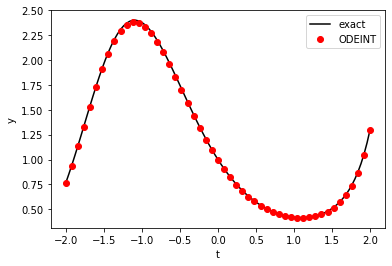

In [44]:
fig, ax =plt.subplots(1,1)
ax.plot(xexact,yexact,'-k',label='exact')
ax.plot(t,sol,'or',label='ODEINT')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.legend()

## SCIPY.INTEGRATE.SOLVE_IVP (preferred for more options) 

* IVP stands for Initial Value Problem
* uses RK45 or other methods
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
* returns object
* note y[[]]

# implementation of `scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval)

In [56]:
from scipy.integrate import solve_ivp

In [57]:
def derivs(y,t):
    return y*t**2-1.2*y

In [58]:
t_span=[-2,2]
y0=[0.76]
method='RK45'
t_eval=np.linspace(-2,2,51)

In [59]:
sol=solve_ivp(dydt,t_span,y0,method=method,t_eval=t_eval)

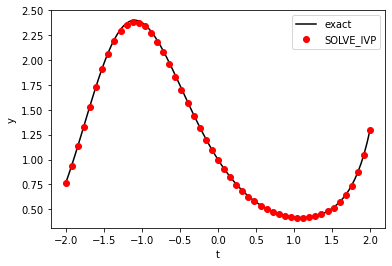

In [60]:
fig, ax =plt.subplots(1,1)
ax.plot(xexact,yexact,'-k',label='exact')
ax.plot(sol.t,sol.y[0],'or',label='SOLVE_IVP')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.legend()